In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/drive/MyDrive/New Data 12.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/New data12')

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
# Set the path to your dataset
train_dir = '/content/drive/MyDrive/New data12/New Data 12/Train'
test_dir = '/content/drive/MyDrive/New data12/New Data 12/Test'

In [5]:
# Define image dimensions
img_rows, img_cols = 224, 224

In [6]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load the training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical'
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',  # Change to 'categorical'
    shuffle=False
)

Found 1170 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [8]:
# Print class indices
print("Class indices:", train_generator.class_indices)

Class indices: {'Fake Note': 0, 'Other Object': 1, 'Real Note': 2}


Random images from training set:


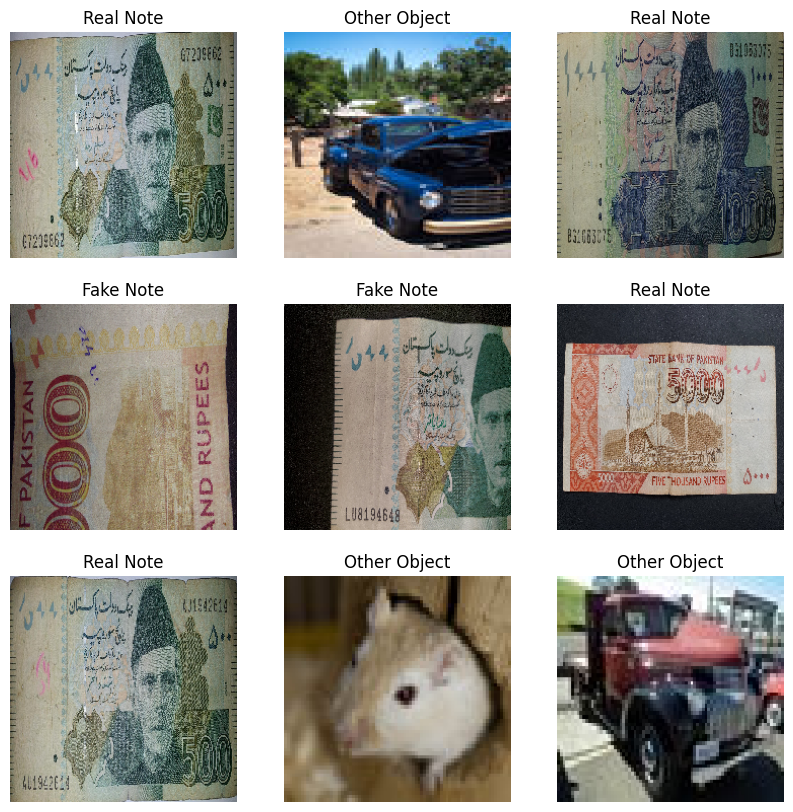

Random images from validation set:


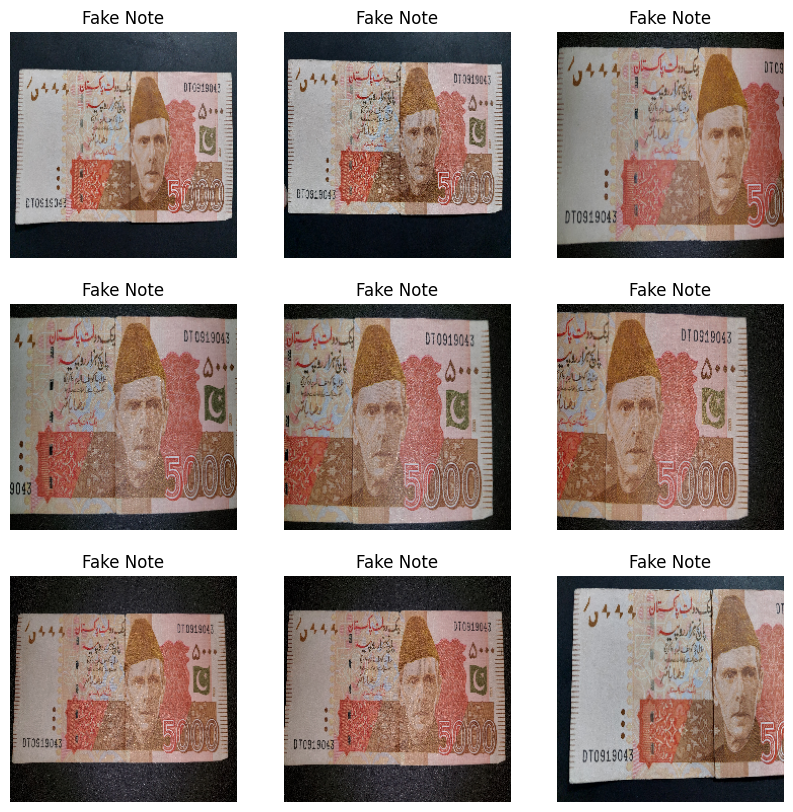

In [9]:
# Function to display random images from a generator
def show_random_images(generator):
    # Get a random batch of images and labels
    images, labels = next(generator)

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label = np.argmax(labels[i])  # Get the index of the class with the highest probability
        plt.title(list(generator.class_indices.keys())[label])
        plt.axis('off')
    plt.show()

# Show random images from the training set
print("Random images from training set:")
show_random_images(train_generator)

# Show random images from the validation set
print("Random images from validation set:")
show_random_images(test_generator)

In [9]:
# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))


In [10]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Build the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer with softmax activation for multi-class classification


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Set steps per epoch and validation steps
steps_per_epoch = 36  # 1170 // 32
validation_steps = 7  # 240 // 32

# Train the model with updated steps per epoch
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=validation_steps
)

Epoch 1/10
36/36 [==============================] - 92s 2s/step - loss: 2.7223 - accuracy: 0.7926 - val_loss: 0.1740 - val_accuracy: 0.9286
Epoch 2/10
36/36 [==============================] - 75s 2s/step - loss: 0.1653 - accuracy: 0.9332 - val_loss: 0.1331 - val_accuracy: 0.9509
Epoch 3/10
36/36 [==============================] - 78s 2s/step - loss: 0.1558 - accuracy: 0.9429 - val_loss: 0.1210 - val_accuracy: 0.9509
Epoch 4/10
36/36 [==============================] - 77s 2s/step - loss: 0.0820 - accuracy: 0.9675 - val_loss: 0.2015 - val_accuracy: 0.8884
Epoch 5/10
36/36 [==============================] - 80s 2s/step - loss: 0.0846 - accuracy: 0.9710 - val_loss: 0.1283 - val_accuracy: 0.9643
Epoch 6/10
36/36 [==============================] - 77s 2s/step - loss: 0.0916 - accuracy: 0.9605 - val_loss: 0.1236 - val_accuracy: 0.9643
Epoch 7/10
36/36 [==============================] - 77s 2s/step - loss: 0.0900 - accuracy: 0.9578 - val_loss: 0.1287 - val_accuracy: 0.9464
Epoch 8/10
36/36 [==

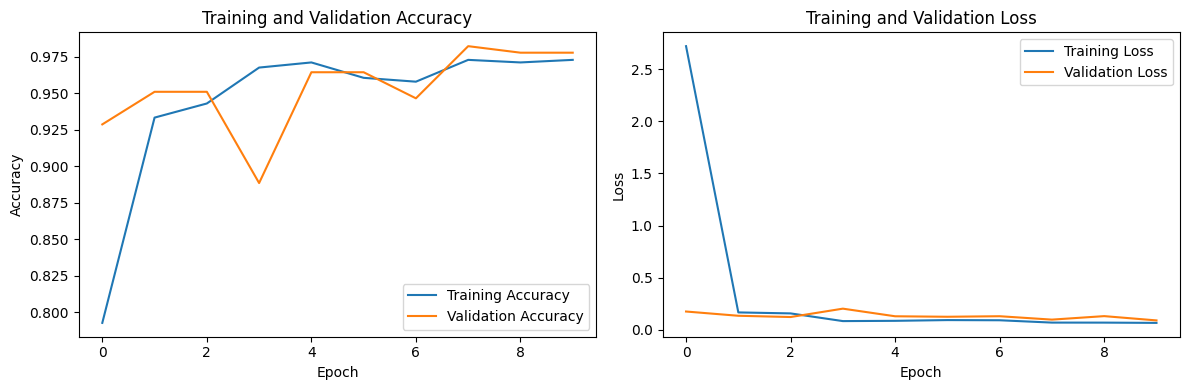

In [14]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

8/8 [==============================] - 18s 2s/step - loss: 0.0827 - accuracy: 0.9792
Test accuracy: 0.98


In [16]:
model.save('/content/drive/MyDrive/MobileNet Mod.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Load your trained TensorFlow model (replace 'my_model.h5' with your model path)
model = tf.keras.models.load_model('/content/drive/MyDrive/MobileNet Mod.h5')

# Define the converter and specify the output file
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optional optimization for efficiency

# Convert the model and save it to a `.tflite` file
tflite_model = converter.convert()
with open("MobileNet Mod.tflite", "wb") as f:
  f.write(tflite_model)

print("Model converted and saved successfully!")

Model converted and saved successfully!


In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the class labels
class_names = {0: 'Fake Notes', 1: 'Other Objects', 2: 'Real Notes'}

# Path to the new image you want to predict
new_image_path = '/content/drive/MyDrive/New data12/New Data 12/Test/Real Note/IMG_20121203_175035.jpg'

# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(img_rows, img_cols))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit expected input shape

# Normalize pixel values
img_array = img_array / 255.0

# Predict the class probabilities
probabilities = model.predict(img_array)[0]  # Get the probabilities of all classes

# Determine the predicted class
predicted_class_index = np.argmax(probabilities)
predicted_class_label = class_names[predicted_class_index]
print(f'Predicted class: {predicted_class_label}')

1/1 [==============================] - 0s 23ms/step
Predicted class: Real Notes
